### Abstract

To begin, let's import the data:

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

We can take a look at the columns so that we know what attributes we are working with.

In [5]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

Now, we can make a few figures to explore what the data is saying. First, I created a scatterplot to show the relationship between a person's age and their credit history length. As can be inferred, older people generally have longer credit histories.

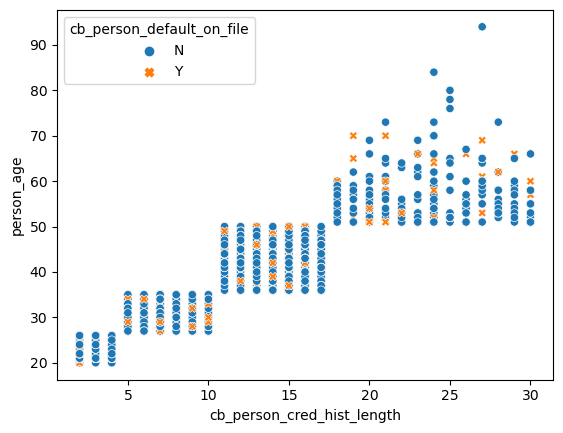

In [138]:
fig, ax = plt.subplots(1, 1)
# cut out the huge outlier--person making 6m/yr--so that we can see patterns more clearly
p1 = sns.scatterplot(df_train[df_train["person_age"] < 100], x = "cb_person_cred_hist_length", y = 'person_age', hue = 'cb_person_default_on_file', style = 'cb_person_default_on_file')


However, I was very interested in the fact that whether or not people defaulted on their loan seemed not to be reliant on age. There are orange x's in all parts of the plot. Because of this, I wanted to look at the mean age for people who had a history of defaulting and people who didn't.

In [157]:
df_train.groupby("cb_person_default_on_file")["person_age"].mean()

cb_person_default_on_file
N    27.721878
Y    27.793096
Name: person_age, dtype: float64

As you can see, although the average age for people who had defaulted was slightly bigger, they still both had averages of about 27. This was surprising to me because I had previously assumed that people who are older, and therefore have longer credit histories, would be more likely to have defaulted on a loan. I wonder if this is due to financial differences between generations.

Next, I wanted to look at interest rate based on history of defaulting. I assumed before making the plot that people who had defaulted before would be given a higher interest rate, and I was correct.

Text(0.5, 1.0, 'Average loan interest rate separated by previous loan defaults')

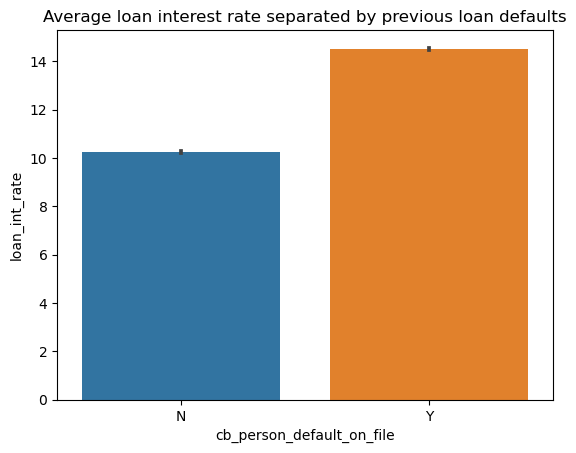

In [156]:
barplot = sns.barplot(df_train, x = "cb_person_default_on_file", y = "loan_int_rate")
barplot.set_title("Average loan interest rate separated by previous loan defaults")

Here, we can see that the average loan interest rate for those who had not defaulted on a loan previously is about 10%. For those who had, it was about 15%. A 5% increase is quite significant, and it seems like having a clean loan history would significantly benefit someone's chances at getting a good interest rate.

Next, I wanted to look at the factors which played into loan intent. To do this, I created a table showing the home ownership counts per loan intent.

In [102]:
df_train.groupby("loan_intent")["person_home_ownership"].value_counts()

loan_intent        person_home_ownership
DEBTCONSOLIDATION  RENT                     2260
                   MORTGAGE                 1841
                   OWN                        62
                   OTHER                      15
EDUCATION          RENT                     2612
                   MORTGAGE                 2089
                   OWN                       412
                   OTHER                      14
HOMEIMPROVEMENT    MORTGAGE                 1384
                   RENT                     1252
                   OWN                       255
                   OTHER                      11
MEDICAL            RENT                     2740
                   MORTGAGE                 1730
                   OWN                       352
                   OTHER                      13
PERSONAL           RENT                     2171
                   MORTGAGE                 1868
                   OWN                       354
                   OTHER    

We can see here that there isn't too much variation, but there are definitely differences that stand out. By far, the most popular type of loan for homeowners is a venture loan, and very few homeowners requested a debt consolidation loan. People with mortgages were spread out pretty evenly across the board, but home improvement had the least mortgagers. By far, home improvement was the least popular type of loan amongst renters. All of these make sense to me for a few reasons. Homeowners gravitated towards venture loans because, in general, they are likely to be more financially stable. Renters did not go for the home improvement loans because they likely don't have much say in what gets done on the property they are renting. There are so few people in the "other" category that it is hard to pick out trends.

Next, we are going to prepare the data the same way that we did last time. We will split into x and y, removing the target variables from the training set. We will also get rid of null variables.

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["loan_status"])

def prepare_data(df):
  df = df.dropna()
  y = le.transform(df["loan_status"])
  df = df.drop(["loan_status"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

x_train, y_train = prepare_data(df_train)
x_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,27,98000,3.0,11750,13.47,0.12,6,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,22,36996,5.0,10000,7.51,0.27,4,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,24,26000,2.0,1325,12.87,0.05,4,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,29,53004,2.0,15000,9.63,0.28,10,True,False,False,...,False,True,False,False,False,False,False,False,True,False
6,21,21700,2.0,5500,14.91,0.25,2,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,8.0,3000,7.29,0.02,17,True,False,False,...,False,True,False,False,False,False,False,False,True,False
26060,23,48000,1.0,4325,5.42,0.09,4,False,False,False,...,True,True,False,False,False,False,False,False,True,False
26061,22,60000,0.0,15000,11.71,0.25,4,False,False,False,...,False,False,True,False,False,False,False,False,True,False
26062,30,144000,12.0,35000,12.68,0.24,8,True,False,False,...,False,False,False,True,False,False,False,False,True,False


Now that the data is properly processed, we can train a logistic regression model. This will follow a similar process to the Penguins blog post, where we loop through all possible combinations of 3 features and add their scores and models to a list.

In [163]:
#| output: false
from itertools import combinations
from sklearn.linear_model import LogisticRegression

all_qual_cols = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]
all_quant_cols = ['person_age', 'person_income', 'person_emp_length', "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
scores = []
combo_array = []


for qual in all_qual_cols:
  qual_cols = [col for col in x_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols                               #<1>
    combo_array.append(cols)                                    #<1>
    LR = LogisticRegression()                                   #<2>
    LR.fit(x_train[cols], y_train)                              #<2>
    new_score = LR.score(x_train[cols], y_train)                #<3>
    scores.append((cols, new_score, LR))                        #<4>

/Users/ellisterling/anaconda3/envs/ml-0451/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ellisterling/anaconda3/envs/ml-0451/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Now, we can find the maximum score in the list of results from the model. We can then split up our results into the attributes, the score, and the logistic regression model.

In [164]:
from operator import itemgetter
best_combo = max(scores, key = itemgetter(1))
print(best_combo)
best_attrs = best_combo[0]
best_score = best_combo[1]
best_lr = best_combo[2]

(['person_emp_length', 'loan_percent_income', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT'], 0.8482559916182826, LogisticRegression())


Before we move on, we should make sure the model doesn't perform drastically worse on unseen data. Below, we cross-validate our model.

In [11]:
#| output: false
from sklearn.model_selection import cross_val_score
cv_scores_LR = cross_val_score(best_lr, x_train[best_attrs], y_train, cv=5)
print(cv_scores_LR.mean())
cv_scores_LR

0.8484738026069572


array([0.85268442, 0.85486687, 0.84042785, 0.84566688, 0.84872299])

We could have gone through and cross-validated all the possible models, but this score is close enough to our initial score that it is okay to continue.In fact, it performed slightly better on the cross-validation than on the training data. Let's continue.

Below, we can extract the w vector (weights) from our best logistic regression model.

In [12]:
w = pd.Series(best_lr.coef_[0])
w

0   -0.019247
1    8.281007
2   -0.735289
3   -0.107546
4   -1.795208
5    0.265245
dtype: float64

In [13]:
def score_function(w, x):
    return x@w

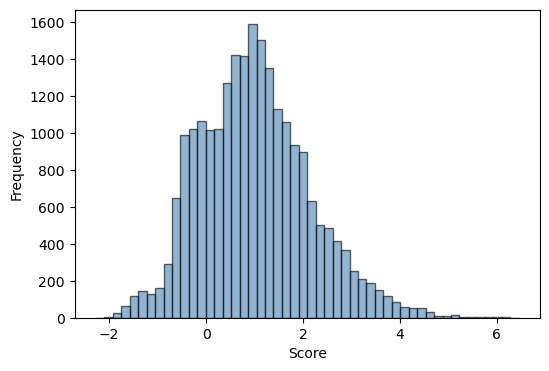

In [45]:
x_train['scores'] = score_function(w.values, x_train[best_attrs])
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
hist = ax.hist(x_train['scores'], bins = 50, color = "steelblue", alpha = 0.6, linewidth = 1, edgecolor = "black")
labs = ax.set(xlabel = r"Score", ylabel = "Frequency") 

In [46]:
def get_benefit(loan_amt, loan_int_rate, default):
    loan_int_rate = loan_int_rate/100
    if default == False:
        cost = loan_amt*(1 + 0.25*loan_int_rate)**10 - loan_amt
    else:
        cost = loan_amt*(1 + 0.25*loan_int_rate)**3 - 1.7*loan_amt
    return cost

In [69]:
x_train['c'] = get_benefit(x_train["loan_amnt"], x_train["loan_int_rate"], False)
x_train['C'] = get_benefit(x_train["loan_amnt"], x_train["loan_int_rate"], True)
x_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,c,C,scores
1,27,98000,3.0,11750,13.47,0.12,6,False,False,False,...,True,False,False,False,False,False,True,4613.567568,-6997.533847,1.201226
2,22,36996,5.0,10000,7.51,0.27,4,False,False,False,...,False,False,False,False,False,True,False,2044.334031,-6426.108799,2.404884
3,24,26000,2.0,1325,12.87,0.05,4,False,False,False,...,True,False,False,False,False,True,False,493.650464,-795.445199,0.640802
4,29,53004,2.0,15000,9.63,0.28,10,True,False,False,...,False,False,False,False,False,True,False,4028.690420,-9390.333437,1.5449
6,21,21700,2.0,5500,14.91,0.25,2,False,False,False,...,False,True,False,False,False,True,False,2430.522429,-3211.752128,2.297004


Text(0, 0.5, 'Total benefit in dollars')

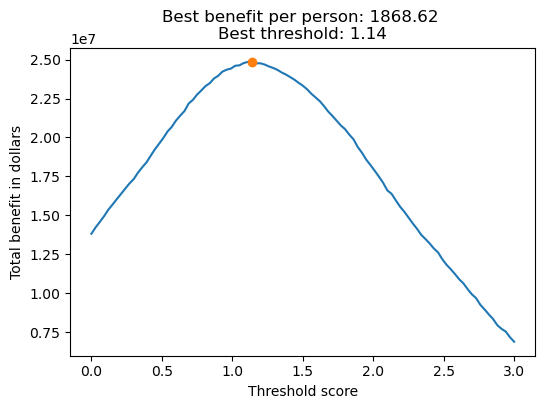

In [74]:
best_benefit = 0
best_threshold = 0
t_arr = []
benefits = []
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
for t in np.linspace(0, 3, 101): 
    y_pred = x_train['scores'] >= t
    tn = ((y_pred == 0) & (y_train == 0)).mean()
    fn = ((y_pred == 0) & (y_train == 1)).mean()
    benefit = x_train['c'][x_train['scores'] >= t].sum()*tn - x_train['C'][x_train['scores'] >= t].sum()*fn
    t_arr.append(t)
    benefits.append(benefit)
    if benefit > best_benefit: 
        best_benefit = benefit
        best_threshold = t

plt.plot(t_arr, benefits)
plt.plot(best_threshold, best_benefit, marker="o")
plt.title(f"Best benefit per person: {(best_benefit/len(x_train[x_train["scores"] < best_threshold])).round(2)} \nBest threshold: {best_threshold}")
plt.xlabel("Threshold score")
plt.ylabel("Total benefit in dollars")

In [70]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)
x_test, y_test = prepare_data(df_test)
x_test['c'] = get_benefit(x_test["loan_amnt"], x_test["loan_int_rate"], False)
x_test['C'] = get_benefit(x_test["loan_amnt"], x_test["loan_int_rate"], True)

In [78]:
t = best_threshold

# compute the scores
x_test['scores'] = score_function(w.values, x_test[best_attrs])
preds = x_test['scores'] >= t

# compute error rates
FN = ((preds == 0) & (y_test == 1)).mean() 
TN = ((preds == 0) & (y_test == 0)).mean() 
# compute the expected gain
gain = x_test['c'][x_test['scores'] >= t].sum()*TN  - x_test['c'][x_test['scores'] >= t].sum()*FN
gain/len(x_test[x_test["scores"] < t])

np.float64(1361.3320954051185)